### Table of Contents

1. [Prediction Prototype Algorithm](#PredictionPrototypeAlgorithm)
2. [Utility Functions](#UtilityFunctions) 
3. [Creating Data Frames for Already Processed DataSets](#CreatingDataFramesforAlreadyProcessedDataSets) 
4. [Covid_19_Countires_Wise Analysis](#Covid_19_Countires_Wise_Analysis)
    - 4.1 [Data Preprocessing](#DataPreprocessing)
    - 4.2 [Creating Time Series model](#CreatingTimeSeriesmodel)
    - 4.3 [Visualize Covid-19 Time Series Predictions](#VisualizeCovid19TimeSeriesPredictions)
    - 4.4 [Prediction Prototype Algorithm](#PredictionPrototypeAlgorithm)
    - 4.5 [Covid 19 Data Frame Generated by Time Series Model](#Covid19DataFrameGeneratedbyTimeSeriesModel)
    - 4.6 [Selecting the population of the countries under consideration](#Selectingthepopulationofthecountriesunderconsideration)
    - 4.7 [Normalising covid data with population  ](#Normalisingcoviddatawithpopulation )
    - 4.8 [Covid-19 Clusters Plot](#Covid19ClustersPlot)
    - 4.9 [Labeling Criterion for Covid Data ](#LabelingCriterionforCovidData)
    - 4.11[Covid19 Daily Data Analysis](#Covid19DailyDataAnalysis)
    - 4.12[Covid19 Daily Clusters Plot](#Covid19DailyClustersPlot)
5. [Population data based on classification of Age groups](#PopulationdatabasedonclassificationofAgegroups)
    - 5.1 [Age groups Classification Clusters Plot](#AgegroupsClassificationClustersPlot)
    - 5.2 [Cluste Labeling :- Age groups](#ClusteLabelingAgegroups)
6. [Co-morbidities Dataframe Clustering](#ComorbiditiesDataframeClustering)
    - 6.1 [HIVs](#HIV)
     - 6.1.1 [HIV Cluster Plot](#HHIVClusterPlot)
     - 6.1.2 [Cluste Labeling :- HIV Cases](#ClusteLabelingHIVCases)
    - 6.2 [Blood Pressure](#BloodPressure)
     - 6.2.1 [Blood Pressure Cluster Plot](#BloodPressureClusterPlot)
     - 6.2.2 [Cluste Labeling :- Blood Pressure Cases](#ClusteLabelingBloodPressureCases)
    - 6.3 [Diabetes](#Diabetes)
     - 6.3.1 [Diabetes Cluster Plot](#DiabetesPlot)
     - 6.3.2 [Cluste Labeling :- Diabetes Cases](#ClusteLabelingDiabetesCases)
    - 6.4 [Tuber Culosis](#TuberCulosis)
     - 6.4.1 [Tuber Culosis Cluster Plot](#TuberCulosisClusterPlot)
    - 6.5 [Medical Expending](#MedicalExpending)
     - 6.5.1 [Medical Expending Cluster Plot](#MedicalExpendingClusterPlot)
     - 6.5.2 [Cluste Labeling :- Medical Expending](#ClusteLabelingMedicalExpending)
7. [Listing all the Clusters of Comorbidites](#ListingalltheClustersofComorbidites)
8. [Main Cluster for Prediction](#MainClusterforPrediction)
    - 8.1 [Main Mega Frame Formation](#MainMegaFrameFormation)
    - 8.2 [Ensuring Clusters Uniformity](#EnsuringClustersUniformity)
    - 8.3 [Main Cluster Plot](#MainClusterPlot)
    - 8.4 [Cluste Labeling :- Main Cluster](#ClusteLabelingMainCluster)
9. [Preparing Data for Deep Net Model](#PreparingDataforDeepNetModel)
    - 9.1 [Deep Net Model](#DeepNetModel)
10. [Vaccine Dosage Prediction](#VaccineDosagePrediction)
    - 10.1 [Minimum Covid Vaccine Required Plot](#MinimumCovidVaccineRequiredPlot)
    - 10.2 [Minimum Percentage Vaccine Required Plot](#MinimumPercentageVaccineRequiredPlot)
    - 10.3 [Countries Covid Vulnerability Status Plot](#CountriesCovidVulnerabilityStatusPlot)
11. [Discussion](#discuss)
    

# Prediction Prototype Algorithm
<a class="anchor" id="PredictionPrototypeAlgorithm"></a>

In [1]:
## To Enable Verbos Mode set Verbose to True
Verbose = False
Debug = False
TimeSeriesEnable = True
No_of_days_To_Predict = 15
Analysis_window = 10    ## Enter no of Days to backpropogate  value < 30 

In [2]:
## Importing important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=30)
matplotlib.rcParams.update({'font.size': 28})
from mpl_toolkits.mplot3d import Axes3D
import math
import datetime as dt
import os
import sys

## ML Models import
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import linear_model
from sklearn.decomposition import PCA

## Deep net model Pytorch module import
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim

## For Date time processing requirments
from datetime import datetime


In [3]:
## PCA Decomposition Configuration
pca = PCA(n_components=2)

## Utility Functions
<a class="anchor" id="UtilityFunctions"></a>

In [4]:

## Visulalization function 
def Visualize(dataset,List_of_count_to_print,title1,ylab,vx=50,vy=30,w=.80):
    df = dataset
    n = 0
    for i in List_of_count_to_print:
        filter1 = df['Country'] == i
        df = df[filter1]
        labels = df['Date']
        conf = df['Confirmed']
        Recov = df['Recovered']
        Death = df['Deaths']
        
        #high = max(conf)
        #low = min(conf)
        
        x = np.arange(len(labels))  # the x label locations 
        width = w  # the width of the bars
        fig, ax = plt.subplots(figsize=(vx,vy))
        rects1 = ax.bar(x - width, conf, width, label='confirmed')
        rects2 = ax.bar(x , Recov, width, label='Recovered')
        rects3 = ax.bar(x + width , Death, width, label='Death')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylab)
        ax.set_title(title1)
        ax.set_xticks(x)
        plt.xticks(rotation=90) 
        #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
        ax.set_xticklabels(labels)
        ax.legend()
        n  = n + 1
    
    
    plt.show()
    
## function to Check the List of Countries avaialable
def count_avalaible(dataframe,country_coul_rep = 'Country'):
    x = 0
    for i in set(dataframe.loc[:,country_coul_rep]):
        print(i,end=' | ')
        x = x + 1
        if(x > 6):
            x = 0
            print()
    print("\n\n##Total No of Countries = " + str(len(set(dataframe.loc[:,country_coul_rep]))))
    
    
## Function for Cluster Plotting 

def plot_cluster(data_frame,title,xlabel,ylabel):
    g1x = []
    g1y = []
    g2x = []
    g2y = []
    g3x = []
    g3y = []
    g4x = []
    g4y = []
    g5x = []
    g5y = []
    g6x = []
    g6y = []
    g7x = []
    g7y = []
    g8x = []
    g8y = []
    g9x = []
    g9y = []
    g10x = []
    g10y = []

    for i,j,k in data_frame:
        if(k == 0):
            g1x.append(i)
            g1y.append(j)
        elif(k==1):
            g2x.append(i)
            g2y.append(j)
        elif(k==2):
            g3x.append(i)
            g3y.append(j)
        elif(k==3):
            g4x.append(i)
            g4y.append(j)
        elif(k==4):
            g5x.append(i)
            g5y.append(j)
        elif(k==5):
            g6x.append(i)
            g6y.append(j)
        elif(k==6):
            g7x.append(i)
            g7y.append(j)
        elif(k==7):
            g8x.append(i)
            g8y.append(j)
        elif(k==8):
            g9x.append(i)
            g9y.append(j)
        elif(k==9):
            g10x.append(i)
            g10y.append(j)



    data = [(g1x,g1y), (g2x,g2y), (g3x,g3y), (g4x,g4y), (g5x,g5y), (g6x,g6y), (g7x,g7y), (g8x,g8y), (g9x,g9y), (g10x,g10y)]
    colors = ("red", "green", "blue","orange","purple","black","magenta","cyan","gold","cadetblue")
    groups = ("Cluster1", "Cluster2", "Cluster3","Cluster4","Cluster5","Cluster6","Cluster7","Cluster8","Cluster9","Cluster10")
    
    ## Testing the number of clusters to be ploted
    no_of_cluster = 0
    for i in data:
        if(len(i[0]) == 0):
            break
        no_of_cluster += 1
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, facecolor = "1.0")

    for data, color, group in zip(data, colors[:no_of_cluster], groups[:no_of_cluster]):
        print(data)
        t = data
        x , y = t
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=100, label=group)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.title(title)
    plt.legend(prop={"size":10}, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    
def plot_cluster_3d(data_frame,title,xlabel,ylabel,zlabel):
    
    a = []
    b = []
    c = []
    d = []
    
    for i in data_frame:
        a.append(i[0][0])
        b.append(i[1][0])
        c.append(i[2][0])
        d.append(i[3])
        
    data = pd.DataFrame()
    
    data['val1'] = a
    data['val2'] = b
    data['val3'] = c
    data['cluster'] = d
    
    colors = ["red", "green", "blue","yellow","purple","black","magenta","cyan"]
    groups = ["Sever1", "Sever2", "Sever3","Sever4","Sever5","Sever6","Sever7","Sever8"]
    
    for i in range(1,len(data)):
        print(data.iloc[i])
    
    
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    #ax = Axes3D(fig)
    
    print(data)
    
    x = np.array(data['val1'])
    y = np.array(data['val2'])
    z = np.array(data['val3'])
    
    ax.scatter(x,y,z, marker="s", c='red', edgecolors='none', s=100, label=groups) #,cmap="RdBu")

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.title(title)
    plt.legend(loc=2,prop={"size":10})
    plt.show()
    
    

In [5]:
import pandas as pd
import torch
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler


class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, file_name):
        # store the inputs and outputs

        file_out = pd.read_csv(file_name)
        self.X = file_out.values
        self.Y = file_out.values

        # Scaling the features
        sc = StandardScaler()
        x_train = sc.fit_transform(self.X)
        y_train = self.Y

        self.x_train = torch.tensor(x_train , dtype=torch.float32)
        self.y_train = torch.tensor(y_train)

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.x_train[idx], self.y_train[idx]]

In [6]:
# Function to transform Dataframes from [Values] to Values

def transformDataframe(data):
    column_heading = list(data.columns)
    for i in range(len(column_heading)):
        if((str(type(data[column_heading[i]][0])) == "<class 'numpy.int32'>") or (str(type(data[column_heading[i]][0])) == "<class 'int'>")):
            column_heading.remove(column_heading[i])
    for k in column_heading:
        for i in data.index: 
            data[k][i] = float(data[k][i][0])
    return data

In [7]:
def auto_labeler(data,pos_neg_vector):
    
    clus_labels = ["Sever-1","Sever-2","Sever-3","Sever-4","Sever-5","Seve-6","Sever-7","Sever-8","Sever-9","Sever-10"]
    
    data = transformDataframe(data) ## Trasnforming data frame
    
    
    ## Calculating means for different cluster values
    clus_count = len(set(data['cluster']))
    Clus_vals = []
    Clus_final_score = []
    for i in range(clus_count):Clus_vals.append(list(data[data['cluster'] == i].mean()))
    print("Cluster Mean Values " + str(Clus_vals))
    
    
    print(len(Clus_vals[0]) - 1)
    
    for j in range(clus_count):
        temp_value = 0
        for i in range(len(Clus_vals[0]) - 1):                                # -1 is done so that we dont consider cluster column
            temp_value = temp_value + (float(pos_neg_vector[i]) * Clus_vals[j][i])
        Clus_final_score.append(temp_value)
    
    print("Final Cumlative Cluster Scores" + str(Clus_final_score))
    
    Decison_Clus = Clus_final_score.copy()
    
    Decison_Clus.sort()
    
    print("Final Cumlative Cluster Scores sorted " + str(Decison_Clus))
    
    result_lis = []
    
    for i in Decison_Clus:
        for j in range(len(Clus_final_score)):
            if(i == Clus_final_score[j]):
                result_lis.append(j)
                break
    
    print("Labeled Cluster:- " + str(result_lis))
    result = []
    for i in result_lis:
        result.append([i,clus_labels[i]])
        
    # Output Generator
    print("\033[1m" + "\nCluster Auto Labeling \n" + "\033[1m")
    for i in range(len(result_lis)):
        print("\033[1m" + "Cluster " + str(result_lis[i])  + " ------> " + "Susceptibility " +clus_labels[i] +  " " + "\033[1m")
        print("\n")
        
        
    return result,result_lis
                
                
    
    
        
        
    
        
    
    

In [8]:
# Auto Weight Generations 


def auto_weight_gen(clus_data):
    length = len(clus_data)
    final_weight_list = []
    weight_list = []
    for i in range(length):
        weight_list.append(i/(length-1))
#         final_weight_list.append(0)
    for i in range(len(clus_data)):
        final_weight_list.append(weight_list[clus_data.index(i)])
    print(final_weight_list)    
    return final_weight_list
        
#auto_weight_gen(labeled_clus_pop) 

def auto_cluster_label(clus_data):
    length = len(clus_data)
    final_weight_list = []
    weight_list = []
    for i in range(length):
        weight_list.append(i)
    for i in range(len(clus_data)):
        final_weight_list.append(weight_list[clus_data.index(i)])
    print(final_weight_list)    
    return final_weight_list

In [9]:
def Data_range_selector(date,no_of_days):
    if(no_of_days > 30):
        no_of_days = 30
        
    month_days = [31,28,31,30,31,30,31,30,31,30,31,30]
    date = Latest_date.split('-')
    val = 0
    if(int(date[2]) > int(no_of_days)):
        val = int(date[2]) - int(no_of_days)
        date[2] = str(val)
        return " ".join(date).replace(" ","-")
    
    
    else:
        if(int(date[1]) != int('01')):
            if((int(date[1]) - 1) < 10):
                date[1] = '0'+ str(int(date[1]) - 1 )
            else:
                date[1] = str(int(date[1]) - 1 )
                
            val = 0 
            val = int(no_of_days) - int(date[2]) 
            date[2] = str(month_days[int(date[1]) - 1] - val)
            
            return " ".join(date).replace(" ","-")
        else:
            date[1] = str(12)
            val = 0 
            val = int(no_of_days) - int(date[2]) 
            date[2] = str(month_days[12 - 1] - val)
            
            date[0] = str(int(date[0]) - 1 )
            
            return " ".join(date).replace(" ","-")
            
            

In [10]:
def transformDataframeto_float(data):
    column_heading = list(data.columns)
    for k in column_heading:
        for i in data.index: 
            data[k][i] = float(data[k][i])
    return data

# Creating Data Frames for Already Processed DataSets
<a class="anchor" id="CreatingDataFramesforAlreadyProcessedDataSets"></a>

In [11]:
Covid_19_Countires_Wise = pd.read_csv('../../Covid-19-Data(selected-dataset)/countries-aggregated.csv')
Blood_Pressure_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Blood_Pressure_Countires_Wise_Processed.csv')
Diabetes_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Diabetes_Countires_Wise_Processed.csv')
HIV_Countires_Wise = pd.read_csv('../Pre_Processed_Data/HIV_Countires_Wise_Processed.csv')
Medical_Expending_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Medical_Expending_Countires_Wise_Processed.csv')
Population_Data_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Population_Data_Countires_Wise_Processed.csv')
Population_Data_Countires_Wise_Descreet = pd.read_csv('../Pre_Processed_Data/Population_Data_Countires_Wise_Descreet_Processed.csv')
Tuber_Culosis_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Tuber_Culosis_Countires_Wise_Processed.csv')
Population_Data_Age_Wise = pd.read_csv('../Pre_Processed_Data/Population_Data_Age_Wise.csv')
## Removing extra Unnamed:0 columns created during file storage 

Blood_Pressure_Countires_Wise = Blood_Pressure_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Diabetes_Countires_Wise = Diabetes_Countires_Wise.drop(['Unnamed: 0'],axis=1)
HIV_Countires_Wise = HIV_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Medical_Expending_Countires_Wise = Medical_Expending_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Population_Data_Countires_Wise = Population_Data_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Tuber_Culosis_Countires_Wise = Tuber_Culosis_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Population_Data_Countires_Wise_Descreet = Population_Data_Countires_Wise_Descreet.drop(['Unnamed: 0'],axis=1)
Population_Data_Age_Wise = Population_Data_Age_Wise.drop(['Unnamed: 0'],axis=1)


## 1. Covid_19_Countires_Wise Analysis
<a class="anchor" id="Covid_19_Countires_Wise_Analysis"></a>

## Data Preprocessing
<a class="anchor" id="DataPreprocessing"></a>

In [12]:
#Covid_19_Countires_Wise = Covid_19_Countires_Wise.drop([length-1])
Covid_19_Countires_Wise.fillna(0)
# if Verbose:
#     Covid_19_Countires_Wise

Date      Country  Confirmed  Recovered  Deaths
0      2020-01-22  Afghanistan          0          0       0
1      2020-01-23  Afghanistan          0          0       0
2      2020-01-24  Afghanistan          0          0       0
3      2020-01-25  Afghanistan          0          0       0
4      2020-01-26  Afghanistan          0          0       0
...           ...          ...        ...        ...     ...
80251  2021-03-10     Zimbabwe      36341      33953    1489
80252  2021-03-11     Zimbabwe      36377      33972    1492
80253  2021-03-12     Zimbabwe      36423      33996    1496
80254  2021-03-13     Zimbabwe      36471      34011    1501
80255  2021-03-14     Zimbabwe      36484      34043    1503

[80256 rows x 5 columns]

In [13]:
data = np.array(Covid_19_Countires_Wise)
date_range = data[:,0]
Country_name = data[:,1]
time_series_data = data[:,[2,3,4]]

if Verbose:
    print(time_series_data)

Xs = time_series_data

n = len(set(list(data[:,0])))
if Verbose:
    print(n)

## Creating Time Series model
<a class="anchor" id="CreatingTimeSeriesmodel"></a>

In [14]:
## No of days data collected so far
n = len(set(list(data[:,0])))

def time_series_forecaste(data,pred):
    fix_latest_data = np.amax(data,axis=0)[0]
    w1 = []
    fix_latest_data = np.datetime64(fix_latest_data) + np.timedelta64(1,'D')
    predict_frame = np.zeros(shape=(1,5)) 
    filter1 = []
    #latest_data = type(dt.datetime(latest_data))
    countries = set(list(data[:,1]))
    p = 0
    x = 0 
    for i in countries:
        latest_data = fix_latest_data
        filter1.clear()
        p = p + 1
        completed = (p/len(countries))*100
        if(p == n/4 or p == n/2 or p == (n*3)/4 or p == n):
            print(f'% completed = {completed}', flush=True)
        count = pred
        
        for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
        data2 = data[filter1]
        w1.clear()
        for j in range(0,len(data2[:,0])):
            if(data2[j,1] == i):
                x = x + 1
                
                for k in range(len(data2[:,[2]])):
                    w1.append((len(data2[:,[2]])- k)/len(data2[:,[2]]))
                
                count = count - 1
                val1 = ((sum(data2[:,2]*w1))/len(data2[:,[2]]))
                val2 = ((sum(data2[:,3]*w1))/len(data2[:,[3]]))
                val3 = ((sum(data2[:,4]*w1))/len(data2[:,[4]]))
                predict_frame = np.append(predict_frame,[str(latest_data),str(i),str(int(val1)),str(int(val2)),str(int(val3))])
                predict_frame = predict_frame.reshape((int(len(predict_frame)/5)),5)
                latest_data = np.datetime64(latest_data) + np.timedelta64(1,'D')
                data2 = np.append(data2,[str(latest_data),str(i),int(val1),int(val2),int(val3)])
                data2 = data2.reshape((int(len(data2)/5)),5)
                data2[:,[2,3,4]] = data2[:,[2,3,4]].astype(np.int)
                w1.clear()
                if(count < 0):
                    break
    new_val = pd.DataFrame(predict_frame[1:,[0,1,2,3,4]])
    new_val = new_val.rename(columns = {0:'Date',1:'Country',2:'Confirmed',3:'Recovered',4:'Deaths'}, inplace = False)
    print('  completed Succesfully ', flush=True)
    return new_val
                
No_of_days_to_predict_in_future = No_of_days_To_Predict         
val123 = time_series_forecaste(data,No_of_days_to_predict_in_future) 
Future_covid_predictions = val123
if Verbose:
    val123  



  completed Succesfully 


In [15]:
val = np.array(val123)
val[:,[2]].astype(np.int)
w1 = []
for i in range(len(val[:,[2]])):
    w1.append((len(val[:,[2]])-i)/len(val[:,[2]]))
    
if Debug:
    print(val[:,[2]].astype(np.int))    
    print(val[:,[2]].astype(np.int)*w1)
    val[:,[2]].astype(np.int)*(val[:,[2]].astype(np.int)/63794)

In [16]:
Complete_Data = val123
filter1 = val123['Country'] == 'US'
val123 = val123[filter1]
if Verbose:
    val123 

## Visualize Covid-19 Time Series Predictions
<a class="anchor" id="VisualizeCovid19TimeSeriesPredictions"></a>

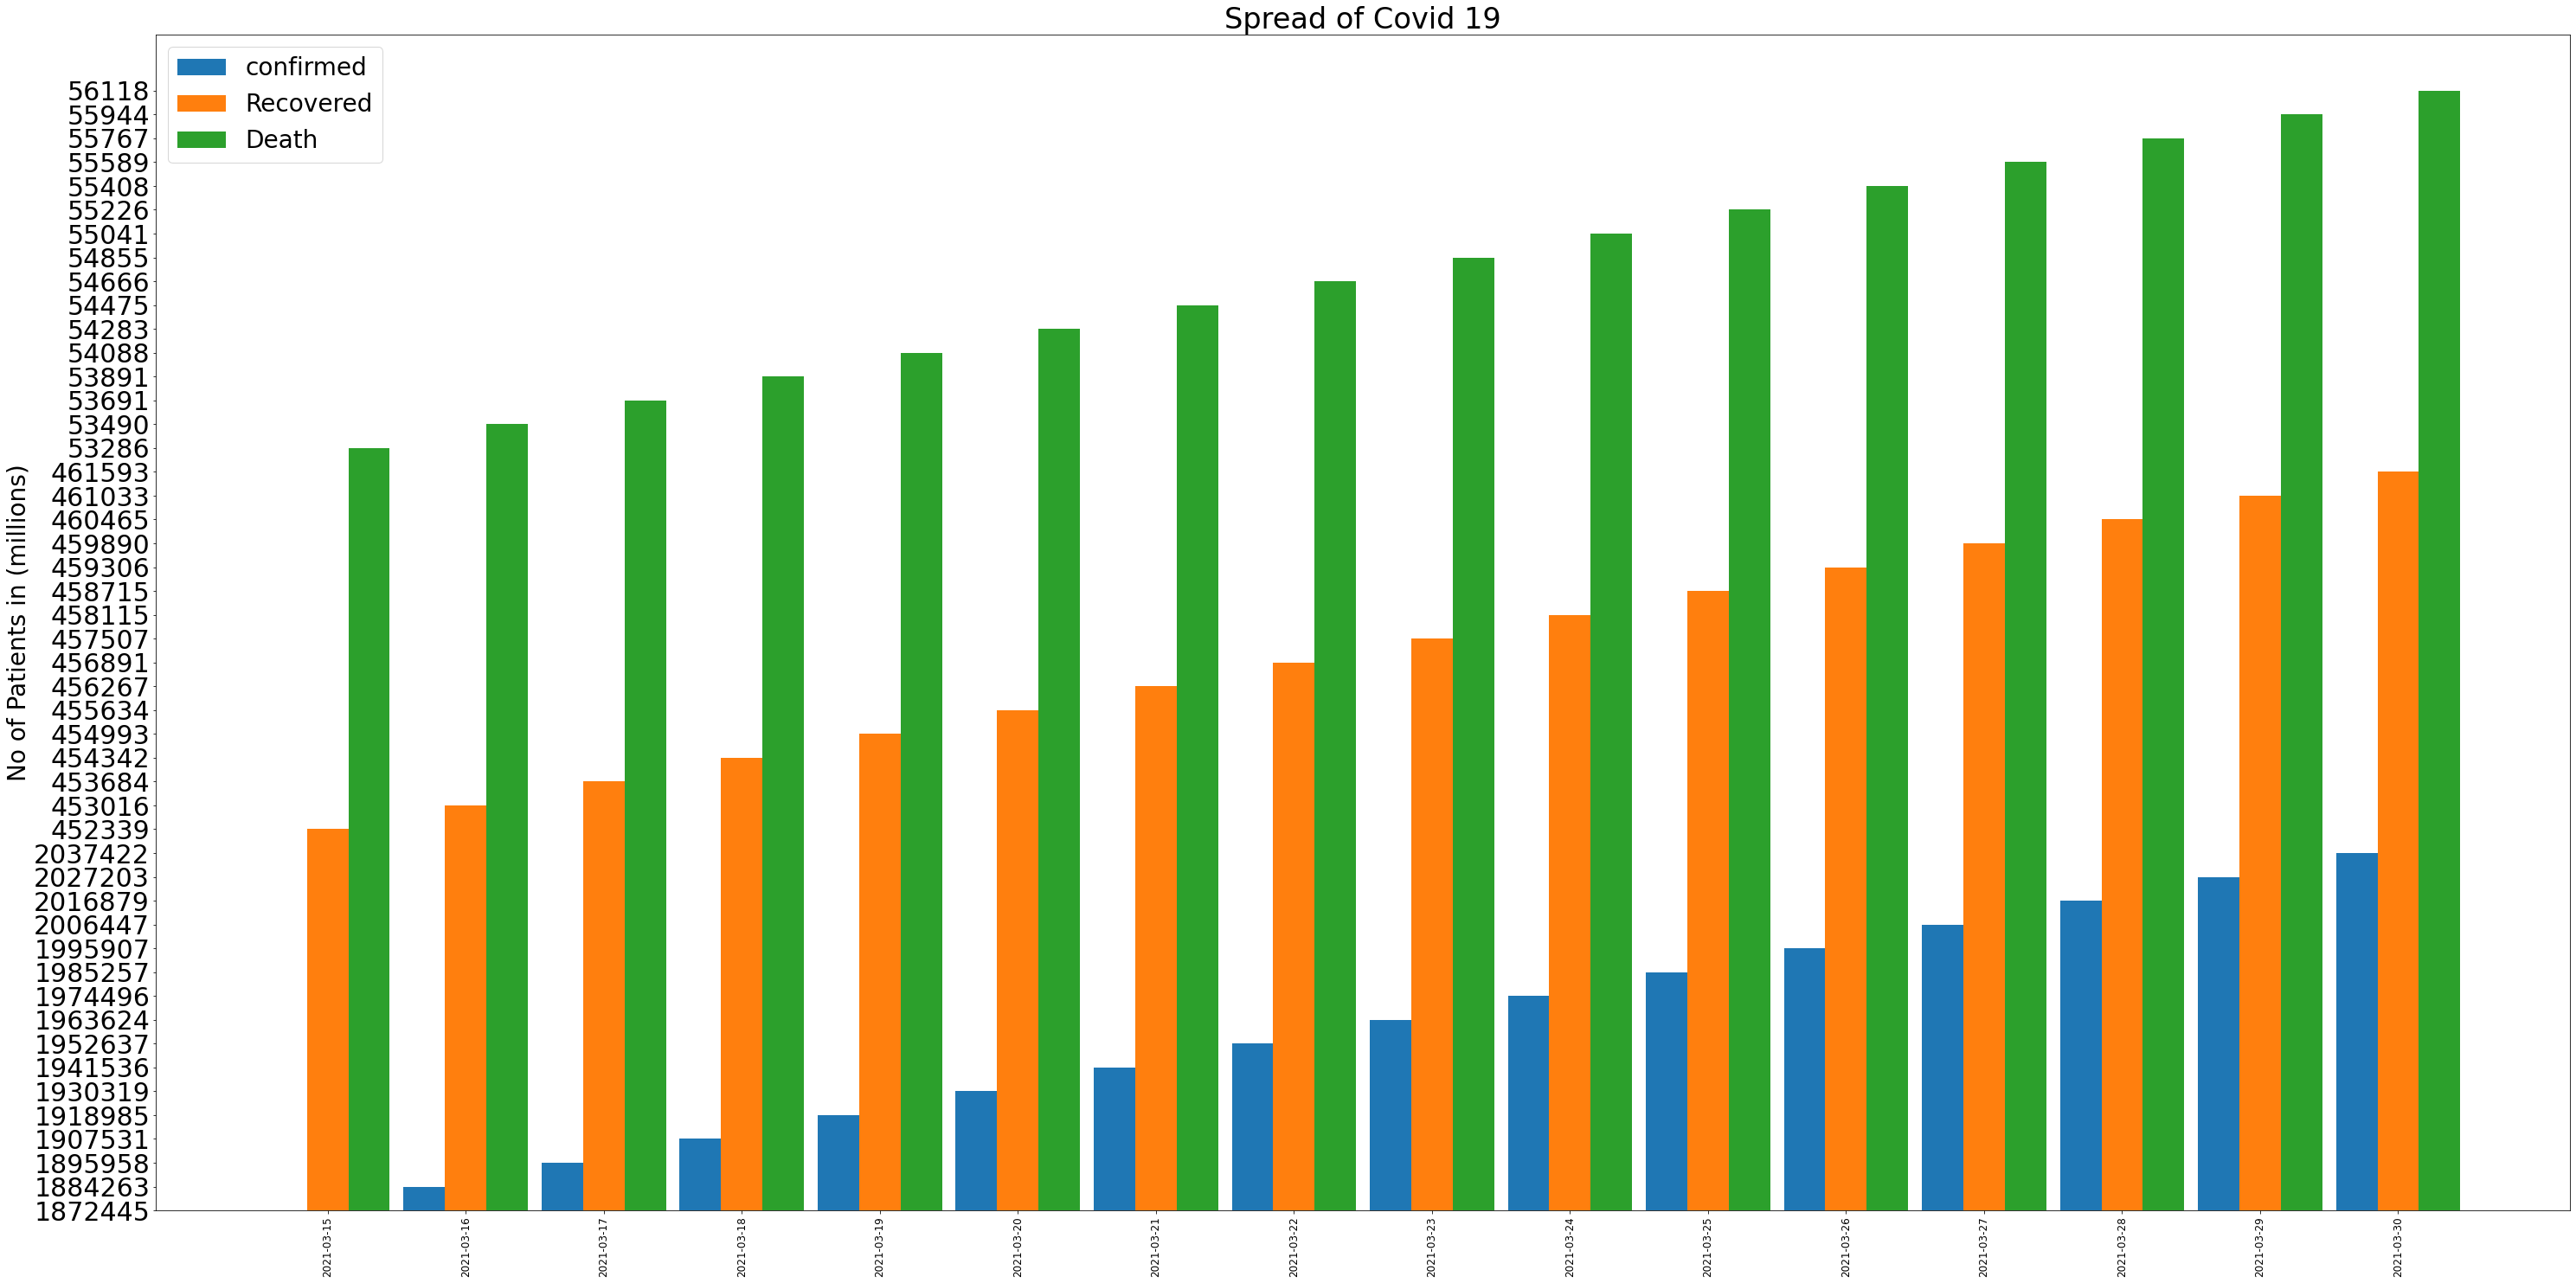

In [17]:
if Debug:
    print(Covid_19_Countires_Wise)
Visualize(val123, 
          ['US'],'Spread of Covid 19','No of Patients in (millions)',vx=50,vy=25,w=.3)

## Prediction Prototype Algorithm
<a class="anchor" id="PredictionPrototypeAlgorithm"></a>

In [18]:
countries = ['Afghanistan','Italy' , 'Kuwait', 'India', 'South Africa' ,'US','Bangladesh', 'Brazil',
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland','Ireland','Argentina',
'Australia', 'Canada', 'China','Slovenia','North Macedonia','Zimbabwe','Sweden','Netherlands','Pakistan']


## Covid 19 Data Frame Generated by Time Series Model
<a class="anchor" id="Covid19DataFrameGeneratedbyTimeSeriesModel"></a>

In [19]:
Complete_data_Time_series_model = Complete_Data

if Verbose:
    Complete_data_Time_series_model

## Covid-19 Data Frame 
<a class="anchor" id="Covid19DataFrame"></a>

In [20]:
## Extracting the latest avaialbele data in the Data Frame
length = len(Covid_19_Countires_Wise['Date'])
Latest_date = Covid_19_Countires_Wise['Date'][length-1]

if Verbose:
    print("Size of data is = " +  str(length))
    print("The Latest Date for the Data is = " + Latest_date)

In [21]:
## Loading the Latest data for the clustering

if(TimeSeriesEnable):
    length = len(Complete_data_Time_series_model['Date'])
    Latest_date = Complete_data_Time_series_model['Date'][length-1]
    Complete_Data_for_daily_Analysis = Complete_Data 
    Complete_Data = Complete_data_Time_series_model[Complete_data_Time_series_model['Date'] == Latest_date]
    Complete_Data.fillna(0)
    
else:
    Complete_Data_for_daily_Analysis = Covid_19_Countires_Wise
    Complete_Data = Covid_19_Countires_Wise[Covid_19_Countires_Wise['Date'] == Latest_date]
    Complete_Data.fillna(0)

if Verbose:
    Complete_Data

In [22]:
# Covid Data 
Complete_Data = np.array(Complete_Data)
Complete_Data[:,[2,3,4]] = np.array(Complete_Data[:,[2,3,4]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data = Complete_Data[:,[0,1,2,3,4]]
filter1 = []
for i in countries:
    filter1.clear()
    for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
    Complete_Data = data[filter1]
    for j in range(0,len(Complete_Data[:,0])):
                if(Complete_Data[j,1] == i):
                
                    '''for k in range(0,len(Complete_Data[:,[2]])):
                        w1.append((len(Complete_Data[:,[2]])- k)/len(Complete_Data[:,[2]]))
                                                                                            '''
                    val1 = ((sum(Complete_Data[:,2]))/len(Complete_Data[:,[2]]))
                    val2 = ((sum(Complete_Data[:,3]))/len(Complete_Data[:,[3]]))
                    val3 = ((sum(Complete_Data[:,4]))/len(Complete_Data[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


if Verbose:
    print(selected_countries[:,[0,1,2,3]])



In [23]:
 if Debug:
    print(selected_countries[:,[0,1,2,3]])

# Selecting the population of the countries under consideration  
<a class="anchor" id="Selectingthepopulationofthecountriesunderconsideration"></a>

In [24]:
if Verbose:
    Population_Data_Countires_Wise_Descreet

In [25]:
# Covid countries population Data 
Complete_Data_pop = Population_Data_Countires_Wise_Descreet
Complete_Data_pop = np.array(Complete_Data_pop)
Complete_Data_pop[:,[8,9]] = np.array(Complete_Data_pop[:,[8,9]]).astype(int)
selected_countries_pop = np.zeros(shape=(1,3)) 
data = Complete_Data_pop[:,[0,1,2,3,4,5,6,7,8,9]]
filter1 = []
for i in countries:
    filter1.clear()
    for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
    Complete_Data_pop = data[filter1]
    for j in range(0,len(Complete_Data_pop[:,0])):
                if(Complete_Data_pop[j,1] == i):
                
                    '''for k in range(0,len(Complete_Data_pop[:,[2]])):
                        w1.append((len(Complete_Data_pop[:,[2]])- k)/len(Complete_Data_pop[:,[2]]))
                                                                                            '''
                    val1 = ((sum(Complete_Data_pop[:,8]))/len(Complete_Data_pop[:,[8]]))
                    val2 = ((sum(Complete_Data_pop[:,9]))/len(Complete_Data_pop[:,[9]]))
                    selected_countries_pop = np.append(selected_countries_pop,[str(i),int(val1),int(val2)])
                    selected_countries_pop = selected_countries_pop.reshape((int(len(selected_countries_pop)/3)),3)
                    break;
selected_countries_pop   = selected_countries_pop[1:,[0,1,2]]


if Verbose:
    print(selected_countries_pop[:,[0,1,2]])

In [26]:
s_c_pop_df = pd.DataFrame(selected_countries_pop)
s_c_df = pd.DataFrame(selected_countries)
int(s_c_pop_df[s_c_pop_df[0] == 'Afghanistan'][1])
s_c_df_not_norm = s_c_df
if True:
    s_c_df

## Normalising covid data with population 
<a class="anchor" id="Normalisingcoviddatawithpopulation"></a>

In [27]:
for i in range(len(s_c_df)):
    s_c_df[1][i] = (int(s_c_df[1][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    s_c_df[2][i] = (int(s_c_df[2][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    s_c_df[3][i] = (int(s_c_df[3][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    

In [28]:
s_c_df = np.array(s_c_df)
selected_countries = s_c_df
if Debug:
    print(selected_countries)

In [29]:
#clustering = DBSCAN(eps=300, min_samples=5).fit(selected_countries[:,[1,2,3]])
clustering = KMeans(n_clusters=6, random_state=0).fit(selected_countries[:,[1,2,3]])  # Converted no of Clusters from 5 -->3
clustering.labels_
clus = list(clustering.labels_)
covid_frame = list(zip(countries,clus))
covid_frame1 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
covid_frame1_data = covid_frame1
if Debug:
    print(covid_frame)
    print(covid_frame1)

In [30]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
covid_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
if Debug:
    print(covid_frame1)

# Covid-19 Clusters Plot
<a class="anchor" id="Covid19ClustersPlot"></a>

([[0.031046633013293443], [0.03861404732609011], [-0.07073792712570226]], [[-0.0482843371053944], [0.02547822584912069], [-0.03597203949088532]])
([[0.43493425986454015], [0.32475633660958086], [0.45550280723703535]], [[-0.09937225970719447], [-0.07146940243548774], [-0.10949491506553403]])
([[-0.0047558470292751774], [0.031877111235930594], [0.018428264349401056]], [[0.16333475515979143], [0.1905992895118001], [0.1752577653887774]])
([[-0.24206244486533257], [-0.16652264696505212], [-0.2169499058660727], [-0.2550700489396743], [-0.15936468043673632], [-0.25576715076355966], [-0.24419505144732945], [-0.2684140086721466], [-0.2575123637151078], [-0.22773141579365402]], [[-0.025565977612916256], [-0.036688461293318264], [-0.02610364957885217], [-0.027173419402653304], [-0.009856113427258268], [-0.028053104917916537], [-0.02661185453911601], [-0.026576756839643965], [-0.02669605240752905], [-0.029350209256439816]])
([[0.08520951699924856], [0.20484854062378197], [0.1696934883183701], [0.1

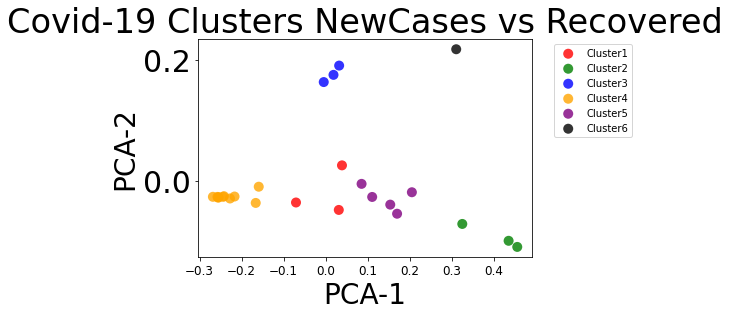

In [31]:
# Visulaize  Clusters 

title = 'Covid-19 Clusters NewCases vs Recovered'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = "cases_detected"
plot_cluster(covid_frame1,title,xlabel,ylabel)

In [32]:
# Auto Labeling of CLusters
if(Debug):
    print(selected_countries_pop[:,[0,1,2]])

## Labeling Criterion for Covid Data
<a class="anchor" id="LabelingCriterionforCovidData"></a>
* Cluster 0 ------> Severity 0 Lowest  
* Cluster 1 ------> Severity 5 Extream 
* Cluster 2 ------> Severity 1 Lower   
* Cluster 3 ------> Severity 4 Highest 
* Cluster 4 ------> Severity 3 High 
* Cluster 5 ------> Severity 2 Medium 

In [33]:
data_covid = pd.DataFrame(np.array(covid_frame1_data),columns=['Total_cases','Recovered','Deaths','cluster'])
_,labeled_clus_covid = auto_labeler(data_covid,[-1,1,-1])

Cluster Mean Values [[0.22486606905108789, 0.15236209957369265, 0.008441330335034077, 0.0], [0.5121877221945792, 0.4477816847239046, 0.010370452998069069, 1.0], [0.3510787172574948, 0.0018846026956048235, 0.017415189691370368, 2.0], [0.03472826500466801, 0.024764220952646365, 0.0006378913047879935, 3.0], [0.3374599669326028, 0.24428561706275126, 0.011874201381241494, 4.0], [0.6155316282076846, 0.13945323593210918, 0.016953976108905686, 5.0]]
3
Final Cumlative Cluster Scores[-0.08094529981242932, -0.07477649046874366, -0.3666093042532603, -0.010601935356809639, -0.10504855125109301, -0.4930323683844811]
Final Cumlative Cluster Scores sorted [-0.4930323683844811, -0.3666093042532603, -0.10504855125109301, -0.08094529981242932, -0.07477649046874366, -0.010601935356809639]
Labeled Cluster:- [5, 2, 4, 0, 1, 3]

Cluster Auto Labeling 

Cluster 5 ------> Susceptibility Sever-1 


Cluster 2 ------> Susceptibility Sever-2 


Cluster 4 ------> Susceptibility Sever-3 


Cluster 0 ------> Suscepti

<ipython-input-33-ad21a0d087ec>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_covid = pd.DataFrame(np.array(covid_frame1_data),columns=['Total_cases','Recovered','Deaths','cluster'])


In [34]:
if Verbose:
    print(list(zip(selected_countries[:,[0]].tolist(),clus)))

In [35]:
if Debug:
    print(s_c_df_not_norm)

## Covid19 Daily Data Analysis 
<a class="anchor" id="Covid19DailyDataAnalysis"></a>

In [65]:

## Checking for TimeSeriesEnable Flag

if(TimeSeriesEnable):
    Analysis_window = Analysis_window + No_of_days_To_Predict
    
    new_df =  Covid_19_Countires_Wise.append(Complete_Data_for_daily_Analysis)
    if Debug:
        print(new_df)
        print(Complete_Data_for_daily_Analysis)
        print(Covid_19_Countires_Wise)

if Verbose:
    print(Complete_Data_for_daily_Analysis)

In [66]:
new_df

Date      Country Confirmed Recovered Deaths
0     2020-01-22  Afghanistan         0         0      0
1     2020-01-23  Afghanistan         0         0      0
2     2020-01-24  Afghanistan         0         0      0
3     2020-01-25  Afghanistan         0         0      0
4     2020-01-26  Afghanistan         0         0      0
...          ...          ...       ...       ...    ...
3067  2021-03-26        Benin       507       392      8
3068  2021-03-27        Benin       509       394      8
3069  2021-03-28        Benin       510       395      8
3070  2021-03-29        Benin       512       397      8
3071  2021-03-30        Benin       514       399      8

[83328 rows x 5 columns]

In [67]:
new_df['Date'] = pd.to_datetime(new_df['Date'],format='%Y-%m-%d')
new_df

Date      Country Confirmed Recovered Deaths
0    2020-01-22  Afghanistan         0         0      0
1    2020-01-23  Afghanistan         0         0      0
2    2020-01-24  Afghanistan         0         0      0
3    2020-01-25  Afghanistan         0         0      0
4    2020-01-26  Afghanistan         0         0      0
...         ...          ...       ...       ...    ...
3067 2021-03-26        Benin       507       392      8
3068 2021-03-27        Benin       509       394      8
3069 2021-03-28        Benin       510       395      8
3070 2021-03-29        Benin       512       397      8
3071 2021-03-30        Benin       514       399      8

[83328 rows x 5 columns]

In [68]:
## Generating new data frame for the specified range 

lowerbound_date =  Data_range_selector(Latest_date,Analysis_window)


lowerbound_date = datetime.strptime(lowerbound_date.replace('-','/'), '%Y/%M/%d')

if TimeSeriesEnable:
    data_dpecific_rangelower = new_df[new_df['Date'] >= lowerbound_date]
else:
    data_dpecific_rangelower = Complete_Data_for_daily_Analysis[Complete_Data_for_daily_Analysis['Date'] >= lowerbound_date]


if(Debug):
    print(data_dpecific_rangelower)

In [70]:
print(lowerbound_date)
data_dpecific_rangelower

2021-01-28 00:02:00


Date      Country Confirmed Recovered Deaths
373  2021-01-29  Afghanistan     54939     47606   2399
374  2021-01-30  Afghanistan     55008     47609   2400
375  2021-01-31  Afghanistan     55023     47679   2400
376  2021-02-01  Afghanistan     55059     47723   2404
377  2021-02-02  Afghanistan     55121     47798   2405
...         ...          ...       ...       ...    ...
3067 2021-03-26        Benin       507       392      8
3068 2021-03-27        Benin       509       394      8
3069 2021-03-28        Benin       510       395      8
3070 2021-03-29        Benin       512       397      8
3071 2021-03-30        Benin       514       399      8

[11712 rows x 5 columns]

In [71]:
Complete_Data = np.array(data_dpecific_rangelower)
Complete_Data[:,[2,3,4]] = np.array(Complete_Data[:,[2,3,4]]).astype(int)

selected_countries = np.zeros(shape=(1,4)) 
data = Complete_Data[:,[0,1,2,3,4]]
filter1 = []
for i in countries:
    filter1.clear()
    for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
    Complete_Data = data[filter1]
    for j in range(0,len(Complete_Data[:,0])):
                if(Complete_Data[j,1] == i):
                
                    '''for k in range(0,len(Complete_Data[:,[2]])):
                        w1.append((len(Complete_Data[:,[2]])- k)/len(Complete_Data[:,[2]]))
                                                                                            '''
                    val1 = ((sum(Complete_Data[:,2]))/len(Complete_Data[:,[2]]))
                    val2 = ((sum(Complete_Data[:,3]))/len(Complete_Data[:,[3]]))
                    val3 = ((sum(Complete_Data[:,4]))/len(Complete_Data[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
date_dpecific_average   = selected_countries[1:,[0,1,2,3]]


if Verbose:
    print(date_dpecific_average[:,[0,1,2,3]])

In [72]:
if Debug:
    date_dpecific_average

In [73]:
s_c_pop_df = pd.DataFrame(selected_countries_pop)
s_c_df = pd.DataFrame(date_dpecific_average)
int(s_c_pop_df[s_c_pop_df[0] == 'Afghanistan'][1])
s_c_df_not_norm = s_c_df
if True:
    s_c_df

In [74]:
for i in range(len(s_c_df)):
    s_c_df[1][i] = (int(s_c_df[1][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    s_c_df[2][i] = (int(s_c_df[2][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    s_c_df[3][i] = (int(s_c_df[3][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    

In [75]:
s_c_df = np.array(s_c_df)
date_dpecific_average = s_c_df
if Debug:
    print(date_dpecific_average)

In [76]:
#clustering = DBSCAN(eps=300, min_samples=5).fit(selected_countries[:,[1,2,3]])
clustering = KMeans(n_clusters=4, random_state=0).fit(date_dpecific_average[:,[1,2,3]])  # Converted no of Clusters from 5 -->3
clustering.labels_
clus = list(clustering.labels_)
covid_frame_daily = list(zip(countries,clus))
covid_frame1_daily = list(zip(date_dpecific_average[:,[1]].tolist(),date_dpecific_average[:,[2]].tolist(),date_dpecific_average[:,[3]].tolist(),clus))
covid_frame1_data_daily = covid_frame1_daily
if Debug:
    print(covid_frame_daily)
    print(covid_frame1_daily)

In [77]:
## Dimensionality Reduction for clusters to plot Graphs in 2D
selected_countries = date_dpecific_average
x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
covid_frame1_daily = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
if Debug:
    print(covid_frame1_daily)

## Covid-19 Daily Average Clusters Plot
<a class="anchor" id="Covid19DailyClustersPlot"></a>

([[1.683968351642325], [1.6429894503834277], [-0.2389917584338869], [1.998462980568566], [1.5212273622645436], [2.7050815690696086], [1.7483236441739447], [1.963904967017247]], [[-0.7638952294362098], [-1.085486298432942], [-0.6884794680980338], [-1.0309722906270553], [-1.07763320062371], [-0.051809286673523636], [-1.0149637503053075], [-1.0218434095932667]])
([[-2.663871462993084], [-1.982747081527544], [-2.472754200871459], [-2.447522413239312], [-1.847105511620875], [-2.7565930425131966], [-2.696472059333108], [-0.5405973961754492], [-2.8017240444990907], [-2.5757131846093144], [-2.542142604872458]], [[-0.1903270035851886], [-0.35180500896221545], [-0.2283129668999324], [-0.23968037082192722], [0.11886808472697089], [-0.1775995695189488], [-0.17948334400637456], [-0.6259481400759199], [-0.167632145408952], [-0.2065131732104178], [-0.22047706011577112]])
([[2.6683518301656477], [1.058791012491445], [0.16715500045483084], [1.2291845443411997], [1.234300348585526]], [[3.134747064497416

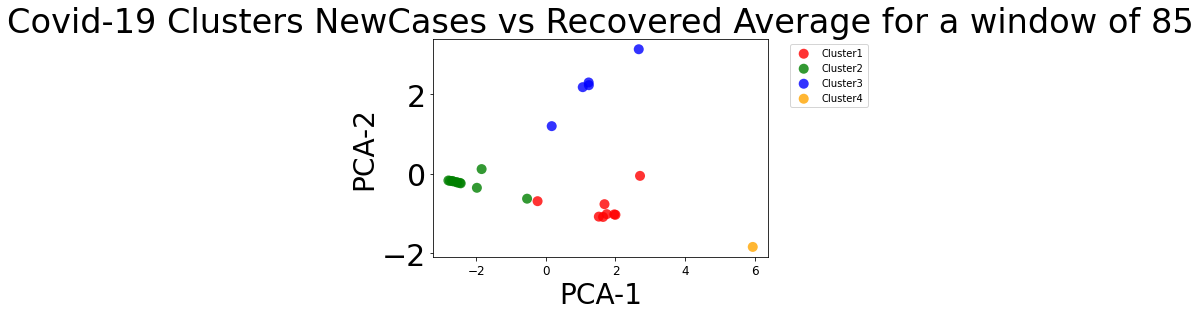

In [78]:
# Visulaize  Clusters 

title = 'Covid-19 Clusters NewCases vs Recovered Average for a window of ' + str(Analysis_window)
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = "cases_detected"
plot_cluster(covid_frame1_daily,title,xlabel,ylabel)

## Labeling Criterion for Covid Data Daily
* Cluster 0 ------> Severity 0 Lowest  
* Cluster 1 ------> Severity 5 Extream 
* Cluster 2 ------> Severity 1 Lower   
* Cluster 3 ------> Severity 4 Highest 
* Cluster 4 ------> Severity 3 High 
* Cluster 5 ------> Severity 2 Medium 

In [ ]:
data_covid_daily = pd.DataFrame(np.array(covid_frame1_data_daily),columns=['Total_cases','Recovered','Deaths','cluster'])
_,labeled_clus_covid_daily = auto_labeler(data_covid_daily,[-1,1,-1])

## Population data based on classification of Age groups
<a class="anchor" id="PopulationdatabasedonclassificationofAgegroups"></a>
### 1. Age 0-16
### 2. Age 17-45
### 3. Age 46-60
### 4. Age 61+

In [ ]:
selected_countries = np.array(Population_Data_Age_Wise)
if Debug:
    selected_countries

In [ ]:
## Clustering

clustering = KMeans(n_clusters=4, random_state=0).fit(selected_countries[:,[1,2,3,4]])
clustering.labels_
clus = list(clustering.labels_)
age_frame = list(zip(countries,clus))
age_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
age_frame2 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),selected_countries[:,[4]].tolist(),clus))
if Debug:
    print(age_frame)
    print("-------------------------cluster data wise---------------------------------------")
    print(age_frame1)
    print("-------------------------------------------------------------------------------")
    print(age_frame2)

if Verbose:
    pd.DataFrame(np.array(age_frame2),columns=['Age 0-16','Age 17-45','Age 46-60','Age 61-100','cluster'])

In [ ]:
pd.DataFrame(np.array(age_frame2),columns=['Age 0-16','Age 17-45','Age 46-60','Age 61-100','cluster'])

In [ ]:
## Dimensionality Reduction for clusters to plot Graphs in 2D


x = selected_countries[:,[1,2,3,4]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
age_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))

if Debug:
    print(age_frame1)

# Age groups Classification Clusters Plot
<a class="anchor" id="AgegroupsClassificationClustersPlot"></a>

In [ ]:
# Visulaize  Clusters 
title = 'Age groups'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = 'Classification based on population Age groups'
plot_cluster(age_frame1,title,xlabel,ylabel)
#plot_cluster_3d(hiv_frame2,title,xlabel,ylabel,zlabel)

# Cluste Labeling :- Age groups
<a class="anchor" id="ClusteLabelingAgegroups"></a>
* Cluster 0 ------> Severity 1 Lower Susceptibility
* Cluster 1 ------> Severity 3 Higher Susceptibility
* Cluster 2 ------> Severity 2 Moderate Susceptibility
* Cluster 3 ------> Severity 4 Critical Susceptibility

In [ ]:
data_pop = pd.DataFrame(np.array(age_frame2),columns=['Age_0_16','Age_17_45','Age_46_60','Age_61_100','cluster'])
_,labeled_clus_pop = auto_labeler(data_pop,[1,1,-1,-1])

# Co-morbidities Dataframe Clustering
<a class="anchor" id="ComorbiditiesDataframeClustering"></a>

## HIV
<a class="anchor" id="HIV"></a>

In [ ]:
## Check the List of Countries avaialable
#HIV_Countires_Wise = pd.read_csv('../HIV infected Population/Data_Extract_From_Health_Nutrition_and_Population_Statistics/c600116a-af72-4faa-945a-ab00ddddb96e_Data.csv')

## Columns renaming for Uniformity

#------------------------------------------------------------
HIV_Countires_Wise_complete = HIV_Countires_Wise
# HIV Data 
HIV_Countires_Wise_complete = np.array(HIV_Countires_Wise_complete)
HIV_Countires_Wise_complete[:,[2,3,4]] = np.array(HIV_Countires_Wise_complete[:,[2,3,4]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_hiv = HIV_Countires_Wise_complete[:,[0,1,2,3,4]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_hiv[:,0])):
            if(data_hiv[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    HIV_Countires_Wise_complete = data_hiv[filter2]
    for j in range(0,len(HIV_Countires_Wise_complete[:,0])):
                if(HIV_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(HIV_Countires_Wise_complete[:,2]))/len(HIV_Countires_Wise_complete[:,[2]]))
                    val2 = ((sum(HIV_Countires_Wise_complete[:,3]))/len(HIV_Countires_Wise_complete[:,[3]]))
                    val3 = ((sum(HIV_Countires_Wise_complete[:,4]))/len(HIV_Countires_Wise_complete[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


if Debug:
    print(selected_countries[:,[0,1,2,3]])

In [ ]:
clustering = KMeans(n_clusters=2, random_state=0).fit(selected_countries[:,[1,2,3]])
clustering.labels_
clus = list(clustering.labels_)
hiv_frame = list(zip(countries,clus))

hiv_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
hiv_frame2 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
if Debug:
    print(hiv_frame)
    print("-------------------------cluster data wise---------------------------------------")
    print(hiv_frame1)
    print("-------------------------------------------------------------------------------")
    print(hiv_frame2)
if Verbose:
    pd.DataFrame(np.array(hiv_frame2),columns=['val1','val2','val3','cluster'])

In [ ]:
## Dimensionality Reduction for clusters to plot Graphs in 2D


x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
hiv_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))

if Debug:
    hiv_frame1

## HIV Cluster Plot
<a class="anchor" id="HHIVClusterPlot"></a>

In [ ]:
# Visulaize  Clusters 
title = 'HIV Cases'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = '2016 HIV CASE'
plot_cluster(hiv_frame1,title,xlabel,ylabel)
#plot_cluster_3d(hiv_frame2,title,xlabel,ylabel,zlabel)

## Cluste Labeling :- HIV Cases
<a class="anchor" id="ClusteLabelingHIVCases"></a>
* Cluster 0 ------> Severity 1 Lower Prevelance
* Cluster 1 ------> Severity 2 High Prevelance


In [ ]:
data_Hiv = pd.DataFrame(np.array(hiv_frame2),columns=['2017_cases','2018_cases','2019_cases','cluster'])
_,labeled_clus_hiv = auto_labeler(data_Hiv,[-1,-1,-1])

## Blood Pressure
<a class="anchor" id="BloodPressure"></a>

In [ ]:
BP_Male_Data = Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Men') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]
#BP_Male_Data = Blood_Pressure_Countires_Wise[Blood_Pressure_Countires_Wise['Year']==2015]

if Verbose:
    BP_Male_Data

In [ ]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity
BP_Male_Data = Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Men') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]

BP_Female_Data =Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Women') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]
#------------------------------------------------------------
Blood_Pressure_Countires_Wise_complete = BP_Male_Data
# BP Data 
Blood_Pressure_Countires_Wise_complete = np.array(Blood_Pressure_Countires_Wise_complete)
Blood_Pressure_Countires_Wise_complete[:,[4,5,6]] = np.array(Blood_Pressure_Countires_Wise_complete[:,[4,5,6]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_bp = Blood_Pressure_Countires_Wise_complete[:,[0,1,2,3,4,5,6]]

if Debug:
    print(data_bp)
    
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_bp[:,0])):
            if(data_bp[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Blood_Pressure_Countires_Wise_complete = data_bp[filter2]
    for j in range(0,len(Blood_Pressure_Countires_Wise_complete[:,0])):
                if(Blood_Pressure_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Blood_Pressure_Countires_Wise_complete[:,4]))/len(Blood_Pressure_Countires_Wise_complete[:,[4]]))
                    val2 = ((sum(Blood_Pressure_Countires_Wise_complete[:,5]))/len(Blood_Pressure_Countires_Wise_complete[:,[5]]))
                    val3 = ((sum(Blood_Pressure_Countires_Wise_complete[:,6]))/len(Blood_Pressure_Countires_Wise_complete[:,[6]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_male   = selected_countries[1:,[0,1,2,3]]
if Debug:
    print("-----------------------------------------MALE DATA-------------------------------------------------")
    print(selected_countries_male[:,[0,1,2,3]])

#-----------------------------------------------------------------------------------------------------------------------

Blood_Pressure_Countires_Wise_complete = BP_Female_Data
# BP Data 
Blood_Pressure_Countires_Wise_complete = np.array(Blood_Pressure_Countires_Wise_complete)
Blood_Pressure_Countires_Wise_complete[:,[4,5,6]] = np.array(Blood_Pressure_Countires_Wise_complete[:,[4,5,6]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_bp = Blood_Pressure_Countires_Wise_complete[:,[0,1,2,3,4,5,6]]

if Debug:
    print(data_bp)
    
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_bp[:,0])):
            if(data_bp[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Blood_Pressure_Countires_Wise_complete = data_bp[filter2]
    for j in range(0,len(Blood_Pressure_Countires_Wise_complete[:,0])):
                if(Blood_Pressure_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Blood_Pressure_Countires_Wise_complete[:,4]))/len(Blood_Pressure_Countires_Wise_complete[:,[4]]))
                    val2 = ((sum(Blood_Pressure_Countires_Wise_complete[:,5]))/len(Blood_Pressure_Countires_Wise_complete[:,[5]]))
                    val3 = ((sum(Blood_Pressure_Countires_Wise_complete[:,6]))/len(Blood_Pressure_Countires_Wise_complete[:,[6]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_female   = selected_countries[1:,[0,1,2,3]]
if Debug:
    print("-----------------------------------------Female DATA-------------------------------------------------")
    print(selected_countries_female[:,[0,1,2,3]])


In [ ]:
def cluster_diabetes(selected_countries):    
    clustering = KMeans(n_clusters=4, random_state=0).fit(selected_countries[:,[1,2,3]])
    clustering.labels_
    clus = list(clustering.labels_)
    BP_frame = list(zip(countries,clus))
    
    
    if Debug:
        print(BP_frame)
        print("-------------------------cluster data wise---------------------------------------")
    BP_frame1 = list(zip(selected_countries[:,[0]].tolist() , selected_countries[:,[1]].tolist() ,selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    BP_frame2 = list(zip(selected_countries[:,[1]].tolist() ,selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    if Debug:
        print(BP_frame1)
    return BP_frame2,BP_frame1 , BP_frame,clus
BP_data_male,BP_frame1_male , BP_frame_male , bp_clus_male = cluster_diabetes(selected_countries_male)
BP_data_female,BP_frame1_female , BP_frame_female , bp_clus_female = cluster_diabetes(selected_countries_female)
#BP_data_male Required for Autoclustering
#BP_data_female  Required for Autoclustering

In [ ]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

#### MALE#####
x = selected_countries_male[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
BP_frame1_male = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),bp_clus_male))
BP_frame1_male

#### FEMALE#######
x = selected_countries_female[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
BP_frame1_female = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),bp_clus_female))
if Debug:
    BP_frame1_female

## Blood Pressure Cluster Plot
<a class="anchor" id="BloodPressureClusterPlot"></a>

In [ ]:
# Visulaize  Clusters 
title1 = '    Blood Pressure Male (2015)'
title2 = '    Blood Pressure Female (2015)'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(BP_frame1_male,title1,xlabel,ylabel)
plot_cluster(BP_frame1_female,title2,xlabel,ylabel)

<a class="anchor" id="ClusteLabelingBloodPressureCases"></a>
## Cluste Labeling :- Blood Pressure Male

* Cluster 0 ------> Severity 1 Lower Prevelance
* Cluster 1 ------> Severity 2 Medium Prevelance
* Cluster 2 ------> Severity 0 lowest Prevelance
* Cluster 3 ------> Severity 3 Highest Prevelance

## Cluste Labeling :- Blood Pressure Female
* Cluster 0 ------> Severity 0 Loweest Prevelance
* Cluster 1 ------> Severity 2 Medium Prevelance
* Cluster 2 ------> Severity 3 Highest Prevelance
* Cluster 3 ------> Severity 1 Lower Prevelance

In [ ]:
data_BP_male = pd.DataFrame(np.array(BP_data_male),columns=['Raised_Blood_Pressure','Raised_Blood_Pressure_more_95','Raised_Blood_Pressure_less_95','cluster'])
_,labeled_clus_bp_male = auto_labeler(data_BP_male,[-1,-1,-1])

data_BP_Female = pd.DataFrame(np.array(BP_data_female),columns=['Raised_Blood_Pressure','Raised_Blood_Pressure_more_95','Raised_Blood_Pressure_less_95','cluster'])
_,labeled_clus_bp_female =auto_labeler(data_BP_Female,[-1,-1,-1])


## Diabetes

<a class="anchor" id="Diabetes"></a>

In [ ]:
Diabetes_Male_Data = Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Men') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]
if Verbose:
    Diabetes_Male_Data

In [ ]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity
Diabetes_Male_Data = Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Men') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]

Diabetes_Female_Data =Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Women') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]
#------------------------------------------------------------
Diabetes_Countires_Wise_complete = Diabetes_Male_Data
# Diabetes Data 
Diabetes_Countires_Wise_complete = np.array(Diabetes_Countires_Wise_complete)
Diabetes_Countires_Wise_complete[:,[3,4,5]] = np.array(Diabetes_Countires_Wise_complete[:,[3,4,5]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_diabetes = Diabetes_Countires_Wise_complete[:,[0,1,2,3,4,5]]

if Debug:
    print(data_diabetes)

filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_diabetes[:,0])):
            if(data_diabetes[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Diabetes_Countires_Wise_complete = data_diabetes[filter2]
    for j in range(0,len(Diabetes_Countires_Wise_complete[:,0])):
                if(Diabetes_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Diabetes_Countires_Wise_complete[:,3]))/len(Diabetes_Countires_Wise_complete[:,[3]]))
                    val2 = ((sum(Diabetes_Countires_Wise_complete[:,4]))/len(Diabetes_Countires_Wise_complete[:,[4]]))
                    val3 = ((sum(Diabetes_Countires_Wise_complete[:,5]))/len(Diabetes_Countires_Wise_complete[:,[5]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_male   = selected_countries[1:,[0,1,2,3]]

if Debug:
    print("-----------------------------------------MALE DATA-------------------------------------------------")
    print(selected_countries_male[:,[0,1,2,3]])

#-----------------------------------------------------------------------------------------------------------------------

Diabetes_Countires_Wise_complete = Diabetes_Female_Data
# Diabetes Data 
Diabetes_Countires_Wise_complete = np.array(Diabetes_Countires_Wise_complete)
Diabetes_Countires_Wise_complete[:,[3,4,5]] = np.array(Diabetes_Countires_Wise_complete[:,[3,4,5]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_diabetes = Diabetes_Countires_Wise_complete[:,[0,1,2,3,4,5]]

if Debug:
    print(data_diabetes)

filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_diabetes[:,0])):
            if(data_diabetes[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Diabetes_Countires_Wise_complete = data_diabetes[filter2]
    for j in range(0,len(Diabetes_Countires_Wise_complete[:,0])):
                if(Diabetes_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Diabetes_Countires_Wise_complete[:,3]))/len(Diabetes_Countires_Wise_complete[:,[3]]))
                    val2 = ((sum(Diabetes_Countires_Wise_complete[:,4]))/len(Diabetes_Countires_Wise_complete[:,[4]]))
                    val3 = ((sum(Diabetes_Countires_Wise_complete[:,5]))/len(Diabetes_Countires_Wise_complete[:,[5]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_female   = selected_countries[1:,[0,1,2,3]]
if Debug:
    print("-----------------------------------------Female DATA-------------------------------------------------")
    print(selected_countries_female[:,[0,1,2,3]])


In [ ]:
def cluster_diabetes(selected_countries):    
    clustering = KMeans(n_clusters=4, random_state=0).fit(selected_countries[:,[1,2,3]])
    clustering.labels_
    clus = list(clustering.labels_)
    DB_frame = list(zip(countries,clus))
    if Debug:
        print(DB_frame)
        print("-------------------------cluster data wise---------------------------------------")
    DB_frame1 = list(zip(selected_countries[:,[0]].tolist(),selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    DB_frame2 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    if Debug:
        print(DB_frame1)
    return DB_frame2,DB_frame1,DB_frame,clus

Diabetes_data_male,Diabetes_frame1_male,Diabetes_frame_male , clus_male = cluster_diabetes(selected_countries_male)
Diabetes_data_female,Diabetes_frame1_female,Diabetes_frame_female,clus_female = cluster_diabetes(selected_countries_female)

In [ ]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

#### MALE#####
x = selected_countries_male[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
Diabetes_frame1_male = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus_male))
Diabetes_frame1_male

#### FEMALE#######
x = selected_countries_female[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
Diabetes_frame1_female = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus_female))

if Debug:
    Diabetes_frame1_female

## Diabetes Cluster Plot
<a class="anchor" id="DiabetesPlot"></a>

In [ ]:
# Visulaize  Clusters 
title1 = '    Diabetes Male (2014)'
title2 = '    Diabetes Female (2014)'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(Diabetes_frame1_male,title1,xlabel,ylabel)
plot_cluster(Diabetes_frame1_female,title2,xlabel,ylabel)

## Cluste Labeling :- Diabetes Male
<a class="anchor" id="ClusteLabelingDiabetesCases"></a>
* Cluster 0 ------> Severity 1 Lower Prevelance
* Cluster 1 ------> Severity 2 Medium Prevelance
* Cluster 2 ------> Severity 3 Highest Prevelance
* Cluster 3 ------> Severity 0 Lowest Prevelance

## Cluste Labeling :- Diabetes Female
* Cluster 0 ------> Severity 1 Lower Prevelance
* Cluster 1 ------> Severity 2 Medium Prevelance
* Cluster 2 ------> Severity 3 Highest Prevelance
* Cluster 3 ------> Severity 0 Lowest Prevelance


In [ ]:
data_diabetes_male = pd.DataFrame(np.array(Diabetes_data_male),columns=['Raised_diabetes','Raised_diabetes_more_95','Raised_diabetes_less_95','cluster'])
_,labeled_clus_diabetes_male = auto_labeler(data_diabetes_male,[-1,-1,-1])

data_diabetes_female= pd.DataFrame(np.array(Diabetes_data_female),columns=['Raised_diabetes','Raised_diabetes_more_95','Raised_diabetes_less_95','cluster'])
_,labeled_clus_diabetes_female = auto_labeler(data_diabetes_female,[-1,-1,-1])


## Tuber Culosis

<a class="anchor" id="TuberCulosis"></a>

In [ ]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity

#------------------------------------------------------------
Tuber_Culosis_Countires_Wise_complete = Tuber_Culosis_Countires_Wise
# TB Data 
Tuber_Culosis_Countires_Wise_complete = np.array(Tuber_Culosis_Countires_Wise_complete)
Tuber_Culosis_Countires_Wise_complete[:,[1,2]] = np.array(Tuber_Culosis_Countires_Wise_complete[:,[1,2]]).astype(int)
selected_countries = np.zeros(shape=(1,3)) 
data_tb = Tuber_Culosis_Countires_Wise_complete[:,[0,1,2]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_tb[:,0])):
            if(data_tb[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Tuber_Culosis_Countires_Wise_complete = data_tb[filter2]
    for j in range(0,len(Tuber_Culosis_Countires_Wise_complete[:,0])):
                if(Tuber_Culosis_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Tuber_Culosis_Countires_Wise_complete[:,1]))/len(Tuber_Culosis_Countires_Wise_complete[:,[1]]))
                    val2 = ((sum(Tuber_Culosis_Countires_Wise_complete[:,2]))/len(Tuber_Culosis_Countires_Wise_complete[:,[2]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/3)),3)
                    break;
selected_countries   = selected_countries[1:,[0,1,2]]


if Verbose:
    print(selected_countries[:,[0,1,2]])

In [ ]:
clustering = KMeans(n_clusters=5, random_state=0).fit(selected_countries[:,[1,2]])
clustering.labels_
clus = list(clustering.labels_)
TB_frame = list(zip(countries,clus))
TB_frame1 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),clus))

if Debug:
    print(TB_frame)
    print("-------------------------cluster data wise---------------------------------------")
    print(TB_frame1)

In [ ]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = selected_countries[:,[1,2]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
TB_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))

if Debug:
    TB_frame1



## Tuber Culosis Cluster Plot
<a class="anchor" id="TuberCulosisClusterPlot"></a>

In [ ]:
# Visulaize  Clusters 
title = 'Tuber Culosis'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(TB_frame1,title,xlabel,ylabel)

## Medical Expending
<a class="anchor" id="MedicalExpending"></a>

In [ ]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity

#------------------------------------------------------------
Medical_Expending_Countires_Wise_complete = Medical_Expending_Countires_Wise
# Medical Expending
Medical_Expending_Countires_Wise_complete = np.array(Medical_Expending_Countires_Wise_complete)
Medical_Expending_Countires_Wise_complete[:,[1,2,3]] = np.array(Medical_Expending_Countires_Wise_complete[:,[1,2,3]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_ME = Medical_Expending_Countires_Wise_complete[:,[0,1,2,3]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_ME[:,0])):
            if(data_ME[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Medical_Expending_Countires_Wise_complete = data_ME[filter2]
    for j in range(0,len(Medical_Expending_Countires_Wise_complete[:,0])):
                if(Medical_Expending_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Medical_Expending_Countires_Wise_complete[:,1]))/len(Medical_Expending_Countires_Wise_complete[:,[1]]))
                    val2 = ((sum(Medical_Expending_Countires_Wise_complete[:,2]))/len(Medical_Expending_Countires_Wise_complete[:,[2]]))
                    val3 = ((sum(Medical_Expending_Countires_Wise_complete[:,3]))/len(Medical_Expending_Countires_Wise_complete[:,[3]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


if Verbose:
    print(selected_countries[:,[0,1,2,3]])

In [ ]:
if Debug:
    countries

In [ ]:
clustering = KMeans(n_clusters=6, random_state=0).fit(selected_countries[:,[1,2,3]])
clustering.labels_
clus = list(clustering.labels_)
medical_expend_frame = list(zip(countries,clus))
medical_expend_frame1 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
medical_expend_frame1_data = medical_expend_frame1
if Debug:
    print(medical_expend_frame)
    print("-------------------------cluster data wise---------------------------------------")
    print(medical_expend_frame1)

In [ ]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
medical_expend_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
if Debug:
    medical_expend_frame1


## Medical Expending Cluster Plot
<a class="anchor" id="MedicalExpendingClusterPlot"></a>

In [ ]:
# Visulaize  Clusters 
title = 'Medical Expending'
xlabel = 'PCA-1'
ylabel = 'PCA-2 '
plot_cluster(medical_expend_frame1,title,xlabel,ylabel)

In [ ]:
if Verbose:
    list(zip(selected_countries[:,[0]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))

## Cluste Labeling :- Medical Expenditure
<a class="anchor" id="ClusteLabelingMedicalExpending"></a>
* Cluster 0 ------> Severity 0 Highest expending country 
* Cluster 1 ------> Severity 4 Lower  expending country
* Cluster 2 ------> Severity 2 High epending country  
* Cluster 3 ------> Severity 5 Lowest expending country
* Cluster 4 ------> Severity 1 upper medium expending country
* Cluster 5 ------> Severity 3 second Highest expending country 


In [ ]:
data_Medical_expenditure = pd.DataFrame(np.array(medical_expend_frame1_data),columns=['2015_expenditure','2016_expenditure','2017_expenditure','cluster'])
_,labeled_clus_pop = auto_labeler(data_Medical_expenditure,[+1,+1,+1])

## Listing all the Clusters of Comorbidites

<a class="anchor" id="ListingalltheClustersofComorbidites"></a>

In [ ]:

if Verbose:
    print("Covid-->\n")
    print(covid_frame)
    print("\nHIV-->\n")
    print(hiv_frame)
    print("\nDiabetes Male-->\n")
    print(Diabetes_frame_male)
    print("\nDiabetes Female-->\n")
    print(Diabetes_frame_female)
    print("\nBP Male-->\n")
    print(BP_frame_male)
    print("\nBP Female-->\n")
    print(BP_frame_female)
    print("\nTB-->\n")
    print(TB_frame)
    print("\nMedical-->\n")
    print(medical_expend_frame)
    print("\Age Group-->\n")
    print(age_frame)
    print("\Covid_Daily-->\n")
    print(covid_frame_daily)

# Main Cluster for Prediction

<a class="anchor" id="MainClusterforPrediction"></a>

## Main Mega Frame Formation
<a class="anchor" id="MainMegaFrameFormation"></a>

In [ ]:
#final_frame = np.concatenate([covid_frame,hiv_frame,Diabetes_frame_male,Diabetes_frame_female,BP_frame_male,BP_frame_female,TB_frame,medical_expend_frame], axis=1)
# Excluded TB Data for now
final_frame = np.concatenate([covid_frame,hiv_frame,Diabetes_frame_male,Diabetes_frame_female,BP_frame_male,BP_frame_female,medical_expend_frame,age_frame,covid_frame_daily], axis=1)
final_frame = final_frame[:,[0,1,3,5,7,9,11,13,15,17]]

if Debug:
    #TB_frame
    #covid_frame
    age_frame

In [ ]:
final_frame

## Ensuring Clusters Uniformity
<a class="anchor" id="EnsuringClustersUniformity"></a>

In [ ]:
if Verbose:
    print(final_frame)

In [ ]:
covid_frame_clus_weight = auto_weight_gen(labeled_clus_covid)#[0/5,5/5,1/5,4/5,3/5,2/5]
hiv_frame_clus_weight = auto_weight_gen(labeled_clus_hiv)#[0,1]
BP_frame__male_clus_weight = auto_weight_gen(labeled_clus_bp_male)#[1/3,2/3,0/3,3/3]
BP_frame__female_clus_weight = auto_weight_gen(labeled_clus_bp_female)#[0/3,2/3,3/3,1/3]
Diabetes_frame_male_clus_weight = auto_weight_gen(labeled_clus_diabetes_male)#[1/3,2/3,3/3,0/3]
Diabetes_frame_female_clus_weight = auto_weight_gen(labeled_clus_diabetes_female)#[1/3,2/3,3/3,0/3]
medical_expend_frame_clus_weight = auto_weight_gen(labeled_clus_pop)#[0/5,4/5,2/5,5/5,1/5,3/5]
age_frame_clus_weight = auto_weight_gen(labeled_clus_pop) #[0/3,2/3,1/3,3/3]
covid_frame_clus_weight_daily = auto_weight_gen(labeled_clus_covid_daily)#[1/3,2/3,0/3,3/3]
## Applying weights for the cluster values
for i in range(len(final_frame[:,0])):
    final_frame[:,1][i] = covid_frame_clus_weight[int(final_frame[:,1][i])]
    final_frame[:,2][i] = hiv_frame_clus_weight[int(final_frame[:,2][i])]
    final_frame[:,3][i] = BP_frame__male_clus_weight[int(final_frame[:,3][i])]
    final_frame[:,4][i] = BP_frame__female_clus_weight[int(final_frame[:,4][i])]
    final_frame[:,5][i] = Diabetes_frame_male_clus_weight[int(final_frame[:,5][i])]
    final_frame[:,6][i] = Diabetes_frame_female_clus_weight[int(final_frame[:,6][i])]
    final_frame[:,7][i] = medical_expend_frame_clus_weight[int(final_frame[:,7][i])]
    final_frame[:,8][i] = age_frame_clus_weight[int(final_frame[:,8][i])]
    final_frame[:,9][i] = covid_frame_clus_weight_daily[int(final_frame[:,9][i])]

In [ ]:
if Verbose:
    print(final_frame)

In [ ]:
clustering = KMeans(n_clusters=5, random_state=0).fit(final_frame[:,[1,2,3,4,5,6,7,8,9]])
clustering.labels_
clus = list(clustering.labels_)
final_Clus_frame = list(zip(countries,clus))

final_Clus_frame1 = list(zip(final_frame[:,[0]].tolist(),final_frame[:,[1]].tolist(),final_frame[:,[2]].tolist(),clus))

final_Clus_frame1_data = list(zip(final_frame[:,[1]].tolist(),final_frame[:,[2]].tolist(),final_frame[:,[3]].tolist(),
                                  final_frame[:,[4]].tolist(),final_frame[:,[5]].tolist(),final_frame[:,[6]].tolist(),
                                  final_frame[:,[7]].tolist(),final_frame[:,[8]].tolist(),final_frame[:,[9]].tolist(),clus))

if Debug:
    print(final_Clus_frame)
    print(final_Clus_frame1)

In [ ]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = final_frame[:,[1,2,3,4,5,6,7,8,9]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
final_Clus_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
if Debug:
    final_Clus_frame1

## Main Cluster Plot
<a class="anchor" id="MainClusterPlot"></a>

In [ ]:
# Visulaize  Clusters 
title = 'Countries Current Covid Situation'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(final_Clus_frame1,title,xlabel,ylabel)

## Master Cluster Ordering
<a class="anchor" id="ClusteLabelingMainCluster"></a>
* Cluster 0 ------> Severity 0
* Cluster 1 ------> Severity 2 
* Cluster 2 ------> Severity 1 
* Cluster 3 ------> Severity 3
* Cluster 4 ------> Severity 4

In [ ]:
# Auto Labeling
data_main_clus = pd.DataFrame(np.array(final_Clus_frame1_data),columns=['covid_frame','hiv_frame','Diabetes_frame_male','Diabetes_frame_female',
                                                            'BP_frame_male','BP_frame_female','medical_expend_frame','age_frame','covid_frame_daily','cluster'])
_,labeled_clus_main_frame = auto_labeler(data_main_clus,[-1,-1,-1,-1,-1,-1,1,-1,-1])

# Preparing Data for Deep Net Model
<a class="anchor" id="PreparingDataforDeepNetModel"></a>

In [ ]:
## Creating Activation Function (Sigmoid Manually To change activation function make updates here !!)

def activation_function(z):
    return 1/(1+torch.exp(-z))
    

In [ ]:

labels = pd.DataFrame(final_Clus_frame)
labels = labels[1]
Country_order = labels[0]
labels = pd.DataFrame(labels)
labels = labels.rename(columns={1: "Target"})

In [ ]:
data_label = pd.DataFrame(final_frame[:,[0]])
data = pd.DataFrame(final_frame[:,[1,2,3,4,5,6,7,8,9]])
Data_Label_Combined = pd.concat([data, labels], axis=1)
## Storing data into a Dataset Deep_Net_Data
Data_Label_Combined.to_csv('../DeepNet_Training_Data/Deep_Net_Data.csv')
#data
if Debug:
    Data_Label_Combined

In [ ]:
Data_Label_Combined = transformDataframeto_float(Data_Label_Combined)
if Debug:
    Data_Label_Combined

In [ ]:
Data_Label_Combined_np_array = np.array(Data_Label_Combined)

if Debug:
    Data_Label_Combined_np_array

In [ ]:
## Converting values to float to convert to tensor
Data_Label_Combined = Data_Label_Combined.astype(float)
Data_Label_Combined['Target'] = Data_Label_Combined['Target'].astype(int)

Data_Label_Combined

In [ ]:

torch_tensor_output = torch.tensor(Data_Label_Combined['Target'].values)
torch_tensor_input_data = torch.tensor(Data_Label_Combined[[0,1,2,3,4,5,6,7,8]].values)
torch_tensor_fullData_data = torch.tensor(Data_Label_Combined[[0,1,2,3,4,5,6,7,8,'Target']].values)

#torch_tensor = torch.from_numpy(Data_Label_Combined_np_array)
if Verbose:
    print(torch_tensor_output)
    print(torch_tensor_input_data)

In [ ]:
#torch.reshape(torch_tensor_fullData_data[0],(5,2))

In [ ]:
class Dataset(object):   

    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])



class dataset(Dataset):
    
    def __init__(self, Data_Frame, transform=None):
        self.data = Data_Frame
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        
        out_data = self.data.iloc[index,[0,1,2,3,4,5,6,7,8]]
        label = self.data.iloc[index, 9]
        
        if self.transform is not None:
            out_data = self.transform(out_data)
         
        return torch.tensor(out_data.values).float() , torch.tensor(label).float()

In [ ]:
Processed_data = dataset(Data_Label_Combined)

In [ ]:
## Loading Data into Data Loader
# create the dataset
dataset = CSVDataset('../DeepNet_Training_Data/Deep_Net_Data.csv')

train_loader = torch.utils.data.DataLoader(Processed_data,batch_size = 1 ,shuffle=False)
# # select rows from the dataset
#train, test = random_split(train_loader, [[...], [...]])
# # create a data loader for train and test sets
# train_dl = DataLoader(train, batch_size=32, shuffle=True)
# test_dl = DataLoader(test, batch_size=1024, shuffle=False)

## Deep Net Model

<a class="anchor" id="DeepNetModel"></a>

In [ ]:
## Deep Net Model Schema

model = nn.Sequential(nn.Linear(9,64),
                     nn.ReLU(),
                     nn.Linear(64,1))   ## We need to improve this 

## Loss definition

#criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

## Training

epochs = 80
for e in range(epochs):
    running_loss = 0
    for dat,lab in train_loader:
        
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(dat)
        loss = criterion(output, lab)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        if(e%10==0):
            print(f"Training loss: {running_loss/len(dat)}")
        
if Verbose:
    ## Prediction 
    with torch.no_grad():
        predictions = model(dat)
    print(predictions)
    print(round(predictions.tolist()[0][0]))

In [ ]:
## Preditions for Country Clusters
final_clus_predictions = []
for dat,lab in train_loader:
    with torch.no_grad():
        predictions = model(dat)
        final_clus_predictions.append(round(predictions.tolist()[0][0]))
final_clus_predictions

In [ ]:
data_label
Deep_Net_Clustering = pd.concat([data_label, pd.DataFrame(final_clus_predictions,columns = ['Clusters'])], axis=1)

Deep_Net_Clustering = Deep_Net_Clustering.rename(columns={0:"Countries"})

Deep_Net_Clustering

# Vaccine Dosage Prediction
<a class="anchor" id="VaccineDosagePrediction"></a>

## For Now 

### Severity 0 = 10%
### Severity 1 = 20%
### Severity 2 = 30%
### Severity 3 = 40%
### Severity 4 = 70%

# Minimum  Vaccine Dosage Requirment Calcualtion

In [ ]:
final_Clus_frame = np.array(final_Clus_frame)

In [ ]:
if Verbose:
    print("Labeld Main Frame Clusters " + str(labeled_clus_main_frame))

In [ ]:
Master_frame_clus_weight = auto_cluster_label(labeled_clus_main_frame)#[0,2,1,3,4]
# Master_frame_clus_weight = [0,2,1,3,4]



## Applying weights for the cluster values
for i in range(len(final_Clus_frame[:,0])):
    final_Clus_frame[:,1][i] = Master_frame_clus_weight[int(final_Clus_frame[:,1][i])]
    

In [ ]:
final_Clus_frame = pd.DataFrame(final_Clus_frame)
lis1 = list(final_Clus_frame[0])
lis2 = list(final_Clus_frame[1])
final_Clus_frame = list(zip(lis1,lis2))

if Verbose:
    print(pd.DataFrame(final_Clus_frame))

In [ ]:
Population_Data_Countires_Wise_Descreet = Population_Data_Countires_Wise_Descreet.fillna(0)

if Verbose:
    print(Population_Data_Countires_Wise_Descreet)

In [ ]:
if Debug:
    print(set(Population_Data_Countires_Wise_Descreet['Country']))

In [ ]:
Population_Data_Countires_Wise_complete = Population_Data_Countires_Wise_Descreet
# Covid Data 
Population_Data_Countires_Wise_complete = np.array(Population_Data_Countires_Wise_complete)
if Debug:
    Population_Data_Countires_Wise_complete[:,[6,7,8]]

In [ ]:
Population_Data_Countires_Wise_complete = Population_Data_Countires_Wise_Descreet
# Covid Data 
Population_Data_Countires_Wise_complete = np.array(Population_Data_Countires_Wise_complete)
Population_Data_Countires_Wise_complete[:,[6,7,8]] = np.array(Population_Data_Countires_Wise_complete[:,[6,7,8]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_pop = Population_Data_Countires_Wise_complete
filter3 = []
for i in countries:
    filter3.clear()
    for j in range(0,len(data_pop[:,0])):
            if(data_pop[j,1] == i):
                filter3.append(True)
            else:
                filter3.append(False)
    Population_Data_Countires_Wise_complete = data_pop[filter3]
    for j in range(0,len(Population_Data_Countires_Wise_complete[:,0])):
                if(Population_Data_Countires_Wise_complete[j,1] == i):
                    val1 = ((sum(Population_Data_Countires_Wise_complete[:,6]))/len(Population_Data_Countires_Wise_complete[:,[6]]))
                    val2 = ((sum(Population_Data_Countires_Wise_complete[:,7]))/len(Population_Data_Countires_Wise_complete[:,[7]]))
                    val3 = ((sum(Population_Data_Countires_Wise_complete[:,8]))/len(Population_Data_Countires_Wise_complete[:,[8]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


if Verbose:
    print(selected_countries)

In [ ]:
final_Clus_frame = np.concatenate([final_Clus_frame,selected_countries], axis=1)

In [ ]:
if Debug:
    print(selected_countries)

In [ ]:
final_Clus_frame = final_Clus_frame[:,[0,1,3,4,5]]
if Debug:
    print(final_Clus_frame)

In [ ]:
final_Clus_frame

In [ ]:
Array_Deep_Net_Clustering = np.array(Deep_Net_Clustering)

## Adding population data for Deep Net Predictions
Array_Deep_Net_Clustering = np.concatenate((Array_Deep_Net_Clustering, final_Clus_frame[:,[2,3,4]]), axis=1)
Array_Deep_Net_Clustering

In [ ]:
def Vacc_Percentage_Calc(final_Clus_frame):
    
    M_Vaccine_dosage = []
    F_Vaccine_dosage = []
    T_Vaccine_dosage = []
    Percent_Pop_Vac = []
    Country_Category = []
    Country_Category_int = []


    for i in final_Clus_frame:
        if int(i[1]) == 0:
            M_Vaccine_dosage.append(int(i[2])*0.1)
            F_Vaccine_dosage.append(int(i[3])*0.1)
            T_Vaccine_dosage.append(int(i[4])*0.1)
            Percent_Pop_Vac.append(int(10))
            Country_Category.append("Low Impact")
            Country_Category_int.append(0)

        elif int(i[1]) == 1:
            M_Vaccine_dosage.append(int(i[2])*0.2)
            F_Vaccine_dosage.append(int(i[3])*0.2)
            T_Vaccine_dosage.append(int(i[4])*0.2)
            Percent_Pop_Vac.append(int(20))
            Country_Category.append("Moderate Impact")
            Country_Category_int.append(1)


        elif int(i[1]) == 2:
            M_Vaccine_dosage.append(int(i[2])*0.3)
            F_Vaccine_dosage.append(int(i[3])*0.3)
            T_Vaccine_dosage.append(int(i[4])*0.3)
            Percent_Pop_Vac.append(int(30))
            Country_Category.append("High Impact")
            Country_Category_int.append(2)

        elif int(i[1]) == 3:
            M_Vaccine_dosage.append(int(i[2])*0.4)
            F_Vaccine_dosage.append(int(i[3])*0.4)
            T_Vaccine_dosage.append(int(i[4])*0.4)
            Percent_Pop_Vac.append(int(40))
            Country_Category.append("Severe Impact")
            Country_Category_int.append(3)


        elif int(i[1]) == 4:
            M_Vaccine_dosage.append(int(i[2])*0.7)
            F_Vaccine_dosage.append(int(i[3])*0.7)
            T_Vaccine_dosage.append(int(i[4])*0.7)
            Percent_Pop_Vac.append(int(70))
            Country_Category.append("Critical Impact")
            Country_Category_int.append(4)
            
            
    return final_Clus_frame,M_Vaccine_dosage,F_Vaccine_dosage,T_Vaccine_dosage,Percent_Pop_Vac,Country_Category,Country_Category_int






        

In [ ]:
def Final_Frame_Calculation(final_Clus_frame,M_Vaccine_dosage,F_Vaccine_dosage,T_Vaccine_dosage,Percent_Pop_Vac,Country_Category,Country_Category_int):
    
    final_Clus_dataframe = pd.DataFrame(final_Clus_frame , 
    columns=['Country','Cluster','Male_Populstion','Female_Population','Total_Population'])

    final_Clus_dataframe['Min_Covid_Vaccine_for_Male'] = M_Vaccine_dosage
    final_Clus_dataframe['Min_Covid_Vaccine_for_Female'] = F_Vaccine_dosage
    final_Clus_dataframe['Min_Covid_Vaccine_for_total'] = T_Vaccine_dosage
    final_Clus_dataframe['Percent_Pop_Vac'] = Percent_Pop_Vac
    final_Clus_dataframe['Vulnerability'] = Country_Category
    final_Clus_dataframe['Vulnerability_int'] = Country_Category_int

    #if Debug:

    print(M_Vaccine_dosage)

    print(F_Vaccine_dosage) 

    print(T_Vaccine_dosage)

    print(Percent_Pop_Vac)

    print(Country_Category)
    

    if Verbose:
        final_Clus_dataframe
    
    return final_Clus_dataframe








In [ ]:
## Calculating the Frames for covid
val1,val2,val3,val4,val5,val6,val7 = Vacc_Percentage_Calc(final_Clus_frame)
final_Clus_dataframe_Clustering_Algo = Final_Frame_Calculation(val1,val2,val3,val4,val5,val6,val7)

val1,val2,val3,val4,val5,val6,val7 = Vacc_Percentage_Calc(Array_Deep_Net_Clustering)
final_Clus_dataframe_Deep_net = Final_Frame_Calculation(val1,val2,val3,val4,val5,val6,val7)


In [ ]:
if Verbose:
    print("--------------------Clustering Predictions-------------")
    print(final_Clus_dataframe_Clustering_Algo)
    print("--------------------Deep Net Predictions-------------")
    print(final_Clus_dataframe_Deep_net)

##  Writing the cleaned data in Cleaned Folder

In [ ]:
final_Clus_dataframe_Clustering_Algo.to_csv('../final_Cluster_frame.csv')
final_Clus_dataframe_Deep_net.to_csv('../final_Cluster_frame_Deep_net.csv')

## Minimum Covid Vaccine Required Plot
<a class="anchor" id="MinimumCovidVaccineRequiredPlot"></a>

In [ ]:
def Visualize1(final_Clus_dataframe):    
    ## Visualisation # 1
    ylab = "Vaccine_Dosage in One Thousand"
    xlab ="Country" + "Date:- " + Latest_date


    df = final_Clus_dataframe


    labels = df['Country']
    prev_vaccMale = df['Min_Covid_Vaccine_for_Male']
    prev_vaccFemale = df['Min_Covid_Vaccine_for_Female']
    prev_vaccTotal = df['Min_Covid_Vaccine_for_total']

    title1 = 'Minimum Covid Vaccine Required'

    #high = int(max(prev_2018))
    #low = 0  

    x = np.arange(len(labels))  # the x label locations 
    width = .50  # the width of the bars
    fig, ax = plt.subplots(figsize=(15,15))
    rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='prev_vaccMale')
    rects2 = ax.bar(x, prev_vaccFemale, width, label='prev_vaccFemale')
    rects3 = ax.bar(x+width/2, prev_vaccTotal, width, label='prev_vaccTotal')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)
    ax.set_title(title1)
    ax.set_xticks(x)
    #ax.set_yticks(y)
    plt.xticks(rotation=90) 
    #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
    ax.set_xticklabels(labels)
    ax.legend()



    plt.show()

In [ ]:
Visualize1(final_Clus_dataframe_Clustering_Algo)

In [ ]:
Visualize1(final_Clus_dataframe_Deep_net)

## Minimum Percentage Vaccine Required Plot
<a class="anchor" id="MinimumPercentageVaccineRequiredPlot"></a>

In [ ]:
def Visualize2(final_Clus_dataframe):    
    ## Visualisation # 2
    ylab = "Percentage of Population Require Vaccine "
    xlab = "Country" + "Date:- " + Latest_date


    df = final_Clus_dataframe


    labels = df['Country']
    prev_vaccMale = df['Percent_Pop_Vac']

    title1 = 'Minimum Percentage of Vacine Required'

    #high = int(max(prev_2018))
    #low = 0  

    x = np.arange(len(labels))  # the x label locations 
    width = .50  # the width of the bars
    fig, ax = plt.subplots(figsize=(15,15))
    rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='Percent_Pop_Vac')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)
    ax.set_title(title1)
    ax.set_xticks(x)
    #ax.set_yticks(y)
    plt.xticks(rotation=90) 
    #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
    ax.set_xticklabels(labels)
    ax.legend()



    plt.show()

In [ ]:
Visualize2(final_Clus_dataframe_Deep_net)

In [ ]:
Visualize2(final_Clus_dataframe_Clustering_Algo)

## Countries Covid Vulnerability Status Plot
<a class="anchor" id="CountriesCovidVulnerabilityStatusPlot"></a>

In [ ]:
def Visualize3(final_Clus_dataframe):    
    ## Visualisation # 3
    ylab = "Countries Covid Vulnerability Status "
    xlab = "Country" + "Date:- " + Latest_date


    df = final_Clus_dataframe


    labels = df['Country']
    prev_vaccMale = df['Vulnerability_int']

    title1 = 'Countires Covid Vulnerability Status'

    #high = int(max(prev_2018))
    #low = 0  

    x = np.arange(len(labels))  # the x label locations 
    width = .50  # the width of the bars
    fig, ax = plt.subplots(figsize=(15,15))
    #rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='Vulnerability')
    rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='Vulnerability \n0 - Low Impact \n 1 - Moderate Impact \
                    \n 2 - High Impact \n 3 - Severe Impact \n 4 - Critical Impact')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)
    ax.set_title(title1)
    ax.set_xticks(x)
    #ax.set_yticks(y)
    plt.xticks(rotation=90) 
    #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
    ax.set_xticklabels(labels)
    ax.legend()



    plt.show()

In [ ]:
Visualize3(final_Clus_dataframe_Deep_net)

In [ ]:
Visualize3(final_Clus_dataframe_Clustering_Algo)

## Points to Discuss
<a class="anchor" id="discuss"></a>

* Should we Take Present Data or Average for covid values
* Clusters Labeling Automation